### 금액별 지불방식 분포
- 기준 1 금액
    + 큰 금액 기준 : 평균 이상
- 기준 2 지불방식
- 접근 방식
    + 기준 1에 해당하는 기준2의 각 항목 매칭
- 인사이트 : 결제시 CMS에 대한 10만원 전후 금액을 지불하는 대상 고객으로 프로모션 진행 고려

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import pandas as pd 
data_df = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
data_df.head()

In [34]:
conditions_age = '20 <= age < 60'

conditions_CMS = 'payment_type == "CMS"'
conditions_가상계좌 = 'payment_type == "가상계좌"'
conditions_무통장 = 'payment_type == "무통장"'
conditions_카드이체 = 'payment_type == "카드이체"'
conditions_지로 = 'payment_type == "지로"'

In [ ]:
amount_mean = data_df['amount'].mean()
amount_mean

In [ ]:
# 해당 Condition 작성
conditions_mean = f'amount >= {amount_mean}'
conditions_mean

In [ ]:
data_df.query(f'{conditions_mean} and {conditions_CMS}')

In [ ]:
data_df.query(f'{conditions_mean} and {conditions_카드이체}')


In [ ]:
data_df.query(f'{conditions_mean} and {conditions_지로}')


In [40]:
data_df_CMS = data_df.query(f'{conditions_mean} and {conditions_CMS}')
data_df_CMS.head(3)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
9,66756702,렌탈,Promotion,서비스 방문,2019-10-20,60,CMS,K1,105900,계약확정,0,없음,1.0,신한은행,정상,24.0,1172.0


<Axes: title={'center': 'CMS'}, xlabel='amount'>

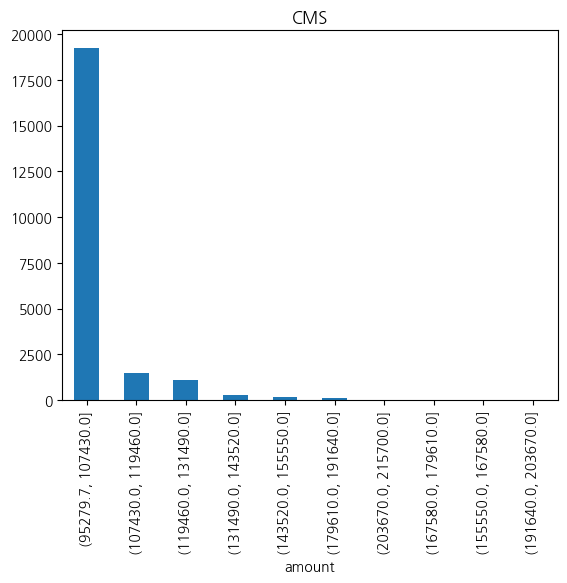

In [41]:
pd.cut(data_df_CMS['amount'], bins=10).value_counts().plot(kind='bar', title='CMS')